<a href="https://colab.research.google.com/github/seunghyeon2776/98/blob/master/%5B2021_02_26%5D_VGG16_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [2]:
labels = ['1.Cancer', '2.Precancer', '3.Inflammatory', '4.Normal']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1]
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train = get_data('/content/drive/MyDrive/train')
val = get_data('/content/drive/MyDrive/validation')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


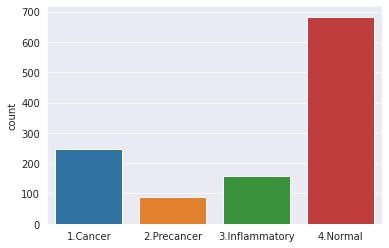

In [4]:
l = []
for i in train:
    if i[1] == 0:
        l.append("1.Cancer")
    elif i[1] == 1:
        l.append("2.Precancer")
    elif i[1] == 2:
        l.append("3.Inflammatory")
    else:
        l.append("4.Normal")
sns.set_style('darkgrid')
sns.countplot(l)



In [5]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [6]:
datagen = ImageDataGenerator(
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [9]:
base_model = tf.keras.applications.VGG16(input_shape = (224, 224, 3), include_top = False, weights = "imagenet", classifier_activation='softmax', classes=1000)
base_model.trainable = False

model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(4, activation="softmax")                                     
                                ])

In [10]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

Epoch 1/500
37/37 [==============================] - 7s 177ms/step - loss: 1.3729 - accuracy: 0.3028 - val_loss: 1.0978 - val_accuracy: 0.5791
Epoch 2/500
37/37 [==============================] - 6s 174ms/step - loss: 1.0535 - accuracy: 0.6034 - val_loss: 1.0500 - val_accuracy: 0.5816
Epoch 3/500
37/37 [==============================] - 7s 178ms/step - loss: 1.0297 - accuracy: 0.6009 - val_loss: 1.0141 - val_accuracy: 0.5893
Epoch 4/500
37/37 [==============================] - 7s 182ms/step - loss: 1.0039 - accuracy: 0.6129 - val_loss: 0.9909 - val_accuracy: 0.5969
Epoch 5/500
37/37 [==============================] - 7s 184ms/step - loss: 0.9392 - accuracy: 0.6374 - val_loss: 0.9620 - val_accuracy: 0.6071
Epoch 6/500
37/37 [==============================] - 7s 182ms/step - loss: 0.9404 - accuracy: 0.6355 - val_loss: 0.9484 - val_accuracy: 0.6071
Epoch 7/500
37/37 [==============================] - 7s 178ms/step - loss: 0.9519 - accuracy: 0.6208 - val_loss: 0.9341 - val_accuracy: 0.6148

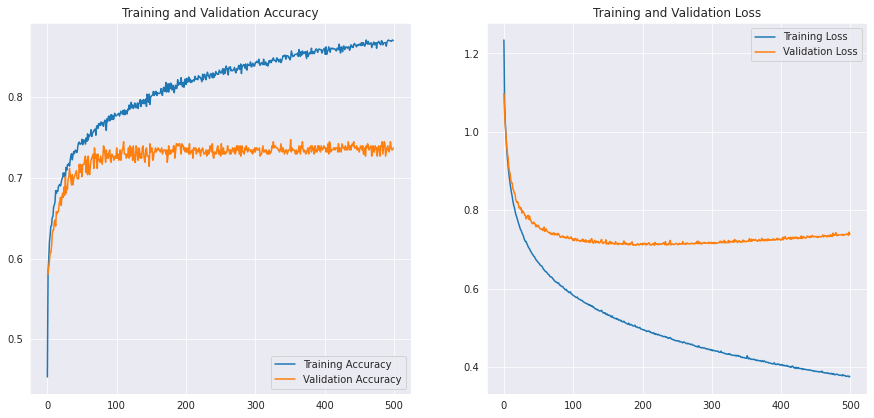

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['1.Cancer (Class 0)','2.Precancer (Class 1)','3.Inflammatory (Class 2)','4.Normal (Class 3)']))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


                          precision    recall  f1-score   support

      1.Cancer (Class 0)       0.63      0.65      0.64        82
   2.Precancer (Class 1)       0.13      0.07      0.09        30
3.Inflammatory (Class 2)       0.59      0.36      0.45        53
      4.Normal (Class 3)       0.82      0.95      0.88       227

                accuracy                           0.74       392
               macro avg       0.55      0.50      0.51       392
            weighted avg       0.70      0.74      0.71       392



ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [ ]:
model = Sequential()

model.add(Conv2D(64,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(Conv2D(64,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())


model.add(Conv2D(128,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(Conv2D(128,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())


model.add(Conv2D(256,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(Conv2D(256,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(Conv2D(256,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())


model.add(Conv2D(512,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(Conv2D(512,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(Conv2D(512,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())


model.add(Conv2D(512,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(Conv2D(512,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(Conv2D(512,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Flatten()) 
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(4,activation="softmax"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 56, 56, 256)      

In [ ]:
opt = Adam(lr=0.001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs = 100 , validation_data = (x_val, y_val))

Epoch 1/100
74/74 [==============================] - 33s 438ms/step - loss: 1.2263 - accuracy: 0.5687 - val_loss: 1.1656 - val_accuracy: 0.5421
Epoch 2/100
74/74 [==============================] - 32s 428ms/step - loss: 1.1277 - accuracy: 0.5692 - val_loss: 1.1620 - val_accuracy: 0.5421
Epoch 3/100
74/74 [==============================] - 31s 422ms/step - loss: 1.0996 - accuracy: 0.5885 - val_loss: 1.1624 - val_accuracy: 0.5421
Epoch 4/100
74/74 [==============================] - 32s 438ms/step - loss: 1.1392 - accuracy: 0.5576 - val_loss: 1.1588 - val_accuracy: 0.5421
Epoch 5/100
74/74 [==============================] - 31s 425ms/step - loss: 1.1058 - accuracy: 0.5913 - val_loss: 1.1594 - val_accuracy: 0.5421
Epoch 6/100
74/74 [==============================] - 31s 424ms/step - loss: 1.1137 - accuracy: 0.5791 - val_loss: 1.1605 - val_accuracy: 0.5421
Epoch 7/100
74/74 [==============================] - 31s 424ms/step - loss: 1.1252 - accuracy: 0.5710 - val_loss: 1.1608 - val_accuracy:

KeyboardInterrupt: ignored

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['Rugby (Class 0)','Soccer (Class 1)']))